# Chapter 6 - Solution of Linear and Nonlinear Equations

### Simultaneous Linear Equations

Some equations are easy to solve (x - 1 = 0), but others such as systems of equations are not as easy to solve, such as the example below.
<ul>
<li> 2w +  x + 4y + z = -4</li>
<li> 3w + 4x -  y - z = 3</li>
<li>  w - 4x + 4y + 5z = 9</li>
<li> 2w - 2x + 4y + 3z = 7</li>
</ul>
for computational purposes, it's able to be written as a matrix <strong>Ax = v</strong> where x = (w,x,y,z) and the matrix A and vector v take the appropriate values. Then, one way to solve the equation is to find the inverse of the matrix A then multiply both sides by it. <strong>x = A^-1v</strong>. This computation is complicated and inefficient, so there are other methods, such as the ones below that offer alternatives.

#### Gausian Elimination

<strong>Step 1</strong> : Multiply equation by any constant. Note that the equation is the same as the previous.

<strong>Step 2</strong> : Add or subtract two equation to get another correct equation. Ensuring one term drops out from the multiple and addition or subtraction.

<strong>Repeat</strong> until have one variable equation.

Lastly, solve using back substitution.

#### Back Substitution

Suppose we have any set of equations with upper or lower triangles all 0. Such as the equations generated by Gaussian elimination procedure. Solve for the singular equation with z = constant. After, substute the z in for the z's in the other equations. Solve those equations until all of the unknowns are solved.

#### Gaussian Elimination with Backsubstitution Example

In [3]:
from numpy import array, empty

A = array([[2,  1,  4,  1],
           [3,  4, -1, -1],
           [1, -4,  1,  5],
           [2, -2,  1,  3]], float)
v = array([-4, 3, 9,7], float)
N = len(v)

# Gaussian Elimination
for m in range(N):
    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    # Now subtract from the lower rows
    for i in range(m+1, N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]
    
# Backsubstitution
x = empty(N, float)
for m in range(N-1, -1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]
        
print(x)

[ 2. -1. -2.  1.]


#### Exercise 6.1 A circuit of Resistors

In [5]:
from numpy import array, empty
VPlus = 12 
         # V1, V2, V3, V4 
A = array([[ 4, -1, -1, -1],
           [-1,  3,  0, -1],
           [-1, -1,  4, -1],
           [-1,  0, -1,  3]], float)
v = array([VPlus, 0, 0, VPlus], float)
N = len(v)

# Gaussian Elimination
for m in range(N):
    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    # Now subtract from the lower rows
    for i in range(m+1, N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]
    
# Backsubstitution
x = empty(N, float)
for m in range(N-1, -1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]
        
print(x)

[ 7.8  5.4  5.4  8.4]


#### Pivoting

Suppose the first element of the array, is zero. This makes the Gaussian elimination fail because it requires a divide by zero. To fix this issue, we can simply interchange two rows (one whose first element is nonzero with the first row. This is called <strong>pivoting</strong>. Note: when switching ensure you don't introduce other error in futher equations. This is done by switching the row with the number furthest from zero with the row below, and then switching the row below the current fow with the row above that one.

In [29]:
A = array([[ 0, -1, -1, -1],
           [-1,  3,  0, -1],
           [-1, -1,  4, -1],
           [-1,  0, -1,  3]], float)
v = array([VPlus, 0, 0, VPlus], float)
N = len(v)

# Gaussian Elimination
for m in range(N):
    # if the diagonal element is 0, switch
    if A[m,m] == 0 and m!=N:
        switch = m+1
        maximum = abs(A[m+1,m])
        for i in range(m+1, N):
            if abs(A[i,m])>maximum:
                switch = i
        if i!= m+1:
            # maximum row with lower row
            A[[i,m+1]] = A[[m+1,i]]
        # switch lower row with current row
        A[[m,m+1]] = A[[m+1,m]]
        print(A)
    # Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    # Now subtract from the lower rows
    for i in range(m+1, N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]

# Backsubstitution
x = empty(N, float)
for m in range(N-1, -1,-1):
    x[m] = v[m]
    for i in range(m+1,N):
        x[m] -= A[m,i]*x[i]
        
print(x)

Conflict
[[-1.  0. -1.  3.]
 [ 0. -1. -1. -1.]
 [-1. -1.  4. -1.]
 [-1.  3.  0. -1.]]
[[ 1. -0.  1. -3.]
 [ 0. -1. -1. -1.]
 [-1. -1.  4. -1.]
 [-1.  3.  0. -1.]]
[[ 1. -0.  1. -3.]
 [-0.  1.  1.  1.]
 [ 0. -1.  5. -4.]
 [ 0.  3.  1. -4.]]
[[ 1.  -0.   1.  -3. ]
 [-0.   1.   1.   1. ]
 [ 0.   0.   1.  -0.5]
 [ 0.   0.  -2.  -7. ]]
[[ 1.  -0.   1.  -3. ]
 [-0.   1.   1.   1. ]
 [ 0.   0.   1.  -0.5]
 [-0.  -0.  -0.   1. ]]
[-8.75  1.25 -1.75  0.5 ]


#### LU Decomposition

This is done when you have <strong>Ax = v</strong> where A is always the same, but v changes. The point is to store the computations and perform them on v only. ![title](LUDecomp.jpg).


#### Exercise 6.4 - Numpy LinAlg with Solver

In [30]:
from numpy.linalg import solve
A = array([[ 0, -1, -1, -1],
           [-1,  3,  0, -1],
           [-1, -1,  4, -1],
           [-1,  0, -1,  3]], float)
v = array([VPlus, 0, 0, VPlus], float)

x = solve(A,v)
print(x)

[-13.  -5.  -5.  -2.]


#### Exercise 6.3 - LU Decomposition

### Calculating the Inverse of a Matrix

Instead of finding cofactors and using those to find the inverse, there's a more efficient way. Consider <strong>AX = V</strong>. Where A,X, and N are NxN matricies. If N is the identity matrix, we know X must be the inverse matrix of A. 

In [31]:
from numpy.linalg import inv
X = inv(A)

#### Tridiagonal and Banded Matricies

The special case that arised often in physics is when the matrix <strong>A</strong> is <i>tridiagonal</i>. ![title](tridiagonal.gif) This makes Gaussian elimination easy. Also when used this way, Gaussian eliminiation is sometimes called <i>tridiagonal matrix algorithm or the Thomas algorithm. These matricies can be done using numpy's solve, but it's typically much faster to use the Thomas algorithm with large tridiagonal matricies. Similarly, we have the same issues with banded matricies ![title](Banded.jpg) Problems sine these can be solved using Thomas's Algorithm as well.

#### Example 6.2 - Vibration in a one-dimensional system

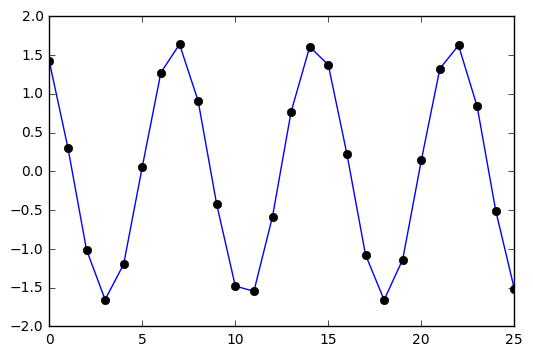

In [34]:
from numpy import zeros,empty
from pylab import plot,show

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega**2

# Set up the initial values of the arrays
A = zeros([N,N], float)
for i in range(N-1):
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k
    
A[0,0] = alpha - k
A[N-1, N-1] = alpha - k
v = zeros(N, float)
v[0] = C

# Perform the Gaussian elimination
for i in range(N-1):
    # Divide row i by its diagonal element
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]
    
    # Now subtract it from the next row down
    A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]
    
# Divide the last element of v by the last diagonal element
v[N-1] /= A[N-1,N-1]

# Backsubstituion
x = empty(N, float)
x[N-1] = v[N-1]
for i in range(N-2, -1, -1):
    x[i] = v[i] - A[i,i+1]*x[i+1]

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

#### A computationally more efficient way

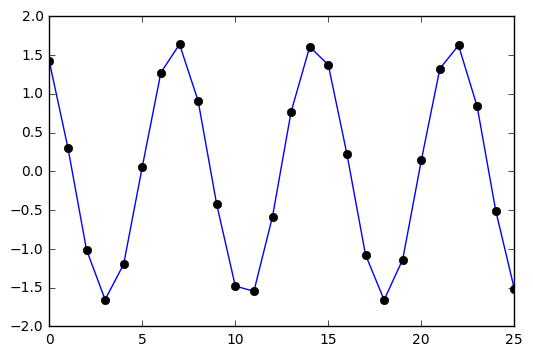

In [36]:
from numpy import empty,zeros
from pylab import plot,show
######################################################################
# file: banded.py
# Function to solve a banded system of linear equations using
# Gaussian elimination and backsubstitution
#
# x = banded(A,v,up,down)
#
# This function returns the vector solution x of the equation A.x = v,
# where v is an array representing a vector of N elements, either real
# or complex, and A is an N by N banded matrix with "up" nonzero
# elements above the diagonal and "down" nonzero elements below the
# diagonal.  The matrix is specified as a two-dimensional array of
# (1+up+down) by N elements with the diagonals of the original matrix
# along its rows, thus:
#
#   (  -   -  A02 A13 A24 ...
#   (  -  A01 A12 A23 A34 ...
#   ( A00 A11 A22 A33 A44 ...
#   ( A10 A21 A32 A43 A54 ...
#   ( A20 A31 A42 A53 A64 ...
#
# Elements represented by dashes are ignored -- it doesn't matter what
# these elements contain.  The size of the system is taken from the
# size of the vector v.  If the matrix A is larger than NxN then the
# extras are ignored.  If it is smaller, the program will produce an
# error.
#
# The function is compatible with version 2 and version 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, September 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import copy

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v
##################################################################################################
# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

# Set up the initial values of the arrays
A = empty([3,N],float)
for i in range(N):
    A[0,i] = -k
    A[1,i] = alpha
    A[2,i] = -k
A[1,0] = alpha - k
A[1,N-1] = alpha - k

v = zeros(N,float)
v[0] = C

# Solve the equations
x = banded(A,v,1,1)

# Make a plot using both dots and lines
plot(x)
plot(x,"ko")
show()

#### Exercise 6.7 A chain of resistors

### Eigenvalues and Eigenvectors

Most areas of physics concern real symmetric matrices (Hermitian matricies with complex numbers). For a symmetric matrix <strong>A</strong>, and eigenvector <strong>v</strong> is a vector satisfying <strong>Av = (lambda)v</strong> where (lambda) is a corresponding eigenvalue. For an NxN matrix, ther are n eigenvectors with all n eigenvalues are orthogonal to one another and normalized. If we wish, we can consider the eigen vectors to be the columns of single NxN matrix V and combine all fo the equation <strong>Av_i = (lambda_i)v_i</strong> to get <strong>AV = VD</strong> where D is a diagonal matrix with eigenvalue (lambda_i) entries. Note that V is orthongonal so V\*V^T = I. This fact will be used to calcuate the eigenvalues and eigenvectors of real symmetric matrices using the *QR algorithm*. 

The QR Decomposition of a matrix: is gone over here http://www.math.ucla.edu/~yanovsky/Teaching/Math151B/handouts/GramSchmidt.pdf.
What it states is that <strong>A = Q_1*R_1</strong>. Means <strong>Q^T_1 A = Q^T_1*Q_1 * R_1 = R_1</strong>. Then repeats process with n Q-vectors.
#### Algorithm
<ol>
    <li>Create N x N matrix V to hold the eigenvectors and initially set it equal to the identity matrix <strong>i</strong>. Also choose target accuracy epsilon for the off-diagonal elements of the eigenvalue matrix.</li>
    <li>Calculate the QR decomposition <strong>A = QR</strong></li>
    <li>Update <strong>A</strong> to the new value <strong>A = RQ</strong></li>
    <li>Multiply <strong>V</strong> on the right by <strong>Q</strong>
    <li>Check the off-diagonal elements of <strong>A</strong>. If any are greater than epsilon, return to step 2. Otherwise, complete.
</ol>


In [37]:
from numpy import array
from numpy.linalg import eigh
A = array([[1,2], [2,1]], float)
x,V = eigh(A)
print(x)
print(V)

[-1.  3.]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [39]:
from numpy import array
from numpy.linalg import eigvalsh
A = array([[1,2], [2,1]], float)
x = eigvalsh(A)
print(x)

[-1.  3.]


#### The QR Algorithm

#### Exercise 6.9 Asymmetric qunatum well

### Nonlinear Equations

#### The Relaxation Method - Fixed point

In [40]:
from math import exp
x = 1.0
for k in range(10):
    x = 2 -exp(-x)
    print(x)

1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121


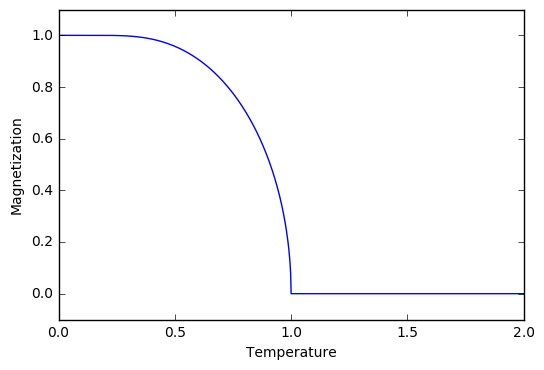

In [41]:
from math import tanh,cosh
from numpy import linspace
from pylab import plot,show,ylim,xlabel,ylabel

# Constants
Tmax = 2.0
points = 1000
accuracy = 1e-6

# Set up lists for plotting
y = []
temp = linspace(0.01,Tmax,points)

# Temperature loop
for T in temp:
    m1 = 1.0
    error = 1.0

    # Loop until error is small enough
    while error>accuracy:
        m1,m2 = tanh(m1/T),m1
        error = abs((m1-m2)/(1-T*cosh(m1/T)**2))
    y.append(m1)

# Make the graph
plot(temp,y)
ylim(-0.1,1.1)
xlabel("Temperature")
ylabel("Magnetization")
show()

#### Exercise 6.11 - Overrelaxation

#### Relaxation method for Two or More Variables

Excercise 6.12

#### Binary Search - Bisection

#### Exercise 6.13 Wien's displacement constant

#### Exercise 6.14 - Newton's Method

#### Example 6.4 - Inverse Hyperbolic Tangent

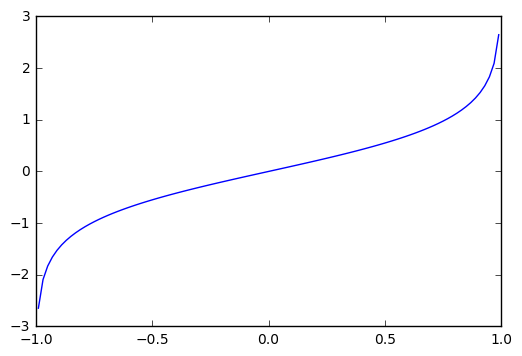

In [43]:
from math import tanh,cosh
from numpy import linspace
from pylab import plot,show

accuracy = 1e-12

def arctanh(u):
    x = 0.0
    delta = 1.0
    while abs(delta)>accuracy:
        delta = (tanh(x)-u)*cosh(x)**2
        x -= delta
    return x

upoints = linspace(-0.99,0.99,100)
xpoints = []
for u in upoints:
    xpoints.append(arctanh(u))
plot(upoints,xpoints)
show()

#### Exercise 6.15 - The roots of a Polynomial

#### Secant Method

#### Exercise 6.16 - The Lagrange Point

#### Exercise 6.17 - Nonlinear Circuits

## 6.4 - Maxima and Minima of Functions

### The Golden Ratio Search

Choose unevenly spaced points on an interval. Suppose that at least on of the two values f(x2) and f(x3) are less than the values f(x1) and f(x3). In that case, we know there must be at least on minimum of the function between x1 and x4, because the function goes down and up again. Then we can narrow down interval until find minimum. Note: should keep x_2 and x_3 symmetric about the center line. Define z to be the ratio between the width of the bracketing interval before and after a step of the search process. If we suppose the minimum falls in the left-hand part of the interval, between x_1 and x_3, then we have z = (x4 -x1)/(x3-x1) = (x2-x1+x3-x1)/(x3-x1) = (x2-x1)/(x3-x1) +1. Looking closely we also see that z = (x3-x1)(x2-x1). Using both of these facts, we know z^2 - z - 1 = 0. Solving for z = (1+sqrt(5))/2 = 1.618...

#### Algorithm
<ol>
    <li>Choose two inital outside points x1 and x4. Then calculate the interior points x2 and x3 according to the golden radio rule abov. Evaluate f(x) at each of the points and check that at least one of the values at x2 and x3 is less than the values at both x1 and x4. Also choose a target accuracy for the position of the minimum.</li>
    <li>If f(x2) &lt; f(x3) then the minimum lies between x1 and x3. In this cass, x3 becomes the the new x4, x2 becomes the new x3, and there will be a new value for x2, chosen once again according to the golden ratio rule. Evaluate f(x) at this new point.</li>
    <li>Otherwise, the minimum lies between x2 and x4. Then x2 becomes the new x1, x3 becomes the new x2, and there will be a new value for x3. Evaluate f(x) at this new point.</li>
    <li>If x4-x1 is greater than the target accuracy, repeat from step 2. Otherwise calculate (1/2)(x2 + (x3) and this is the final estimate of the position of the minimum.</li>
    <li>If x4 -x1 is greater than the target accuracy, repeat from step 2. Otherwise , calculate (1/2)(x2+x3) and this is the final estimate of the position of the minimum.</li>
</ol>

#### Example 6.5 - The Buckingham Potential

In [44]:
from math import exp,sqrt

# Constants
sigma = 1.0             # Value of sigma in nm
accuracy = 1e-6         # Required accuracy in nm
z = (1+sqrt(5))/2       # Golden ratio

# Function to calculate the Buckingham potential
def f(r):
    return (sigma/r)**6 - exp(-r/sigma)

# Initial positions of the four points
x1 = sigma/10
x4 = sigma*10
x2 = x4 - (x4-x1)/z
x3 = x1 + (x4-x1)/z

# Initial values of the function at the four points
f1 = f(x1)
f2 = f(x2)
f3 = f(x3)
f4 = f(x4)

# Main loop of the search process
while x4-x1>accuracy:
    if f2<f3:
        x4,f4 = x3,f3
        x3,f3 = x2,f2
        x2 = x4 - (x4-x1)/z
        f2 = f(x2)
    else:
        x1,f1 = x2,f2
        x2,f2 = x3,f3
        x3 = x1 + (x4-x1)/z
        f3 = f(x3)

# Print the result
print("The minimum falls at",0.5*(x1+x4),"nm")

The minimum falls at 1.630516067174875 nm


#### Exercise 6.18 - The temperature of a light bulb

#### The Gauss-Newton Method and Gradient Descent
We can find maxima and minima by noting that f'(x) = 0. But this means the minima and maxima are nothing other than the roots of the derivative function. So using an altered form of Newton's Method, we know x' = x - f'(x)/f''(x). But sometimes calculating derivatives is hard, so we estimate them.